## **Loan Approval Prediction**

## Importing the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Set pandas display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.width', 1000)  # Adjust the width of the display

# Configure matplotlib settings
plt.rcParams['figure.figsize'] = [10, 6]  # Set default figure size
plt.rcParams['axes.grid'] = True  # Enable grid by default

# Set seaborn style
sns.set(style="whitegrid")

# Optional: Set numpy display options
np.set_printoptions(threshold=np.inf)  # Display entire numpy arrays

## **Dataset Description**:
<br>This dataset contains information regarding loan applications, including demographic details, income information, loan amounts, and the approval status. It provides insights into factors that might influence loan approval, such as the applicant's income, credit history, and employment status. The dataset can be used to analyze trends, build predictive models for loan approval, and understand the key factors impacting the financial decisions of lending institutions.

The dataset contains 614 rows and 13 columns, each representing a specific aspect of a loan application.

**<br>Below are the features in the dataset** 

1.	Loan	A unique id 
2.	Gender	Gender of the applicant Male/female
3.	Married	Marital Status of the applicant, values will be Yes/ No
4.	Dependents	It tells whether the applicant has any dependents or not.
5.	Education	It will tell us whether the applicant is Graduated or not.
6.	Self_Employed	This defines that the applicant is self-employed i.e. Yes/ No
7.	ApplicantIncome	Applicant income
8.	CoapplicantIncome	Co-applicant income
9.	LoanAmount	Loan amount (in thousands)
10.	Loan_Amount_Term	Terms of loan (in months)
11.	Credit_History	Credit history of individual’s repayment of their debts
12.	Property_Area	Area of property i.e. Rural/Urban/Semi-urban 
13.	Loan_Status	Status of Loan Approved or not i.e. Y- Yes, N-No 

In [3]:
# Read the dataset from the CSV file
df = pd.read_csv("loan_prediction.csv")

# Display the first 5 rows of the dataframe to get an overview of the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# To find the duplicate values in the dataset
print(df.duplicated().sum())

0


In [5]:
# Display the shape of the dataframe to understand its dimensions
print("\nShape of the dataset (number of rows and columns):")
print(df.shape)


Shape of the dataset (number of rows and columns):
(614, 13)


In [6]:
# Check for missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


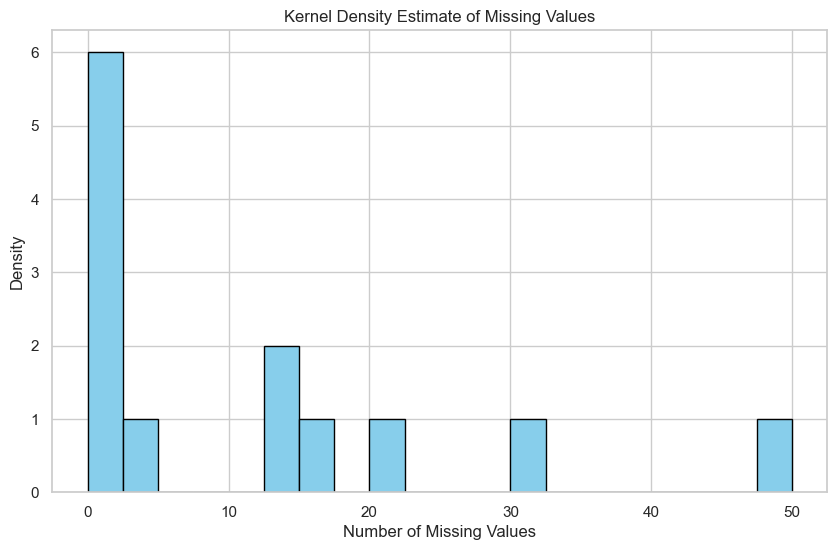

In [7]:
# Plot the KDE of missing values
df.isna().sum().sort_values(ascending=False).plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Kernel Density Estimate of Missing Values')
plt.xlabel('Number of Missing Values')
plt.ylabel('Density')

# Show the plot
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [9]:
loan_status_counts = df['Loan_Status'].value_counts()
print(loan_status_counts)

Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [10]:
import plotly.express as px

# Count the occurrences of each distinct value in the 'Loan_Status' column
loan_status_counts = df['Loan_Status'].value_counts()

# Plot the pie chart using the counts
fig = px.pie(names=loan_status_counts.index, values=loan_status_counts.values, title='Loan Status Distribution')
fig.show()


### **Handle the missing values in the dataset**

In [11]:
# Impute categorical columns with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Impute numerical columns
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\duvvu\AppData\Local\Temp\ipykernel_32544\3946715254.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\duvvu\AppData\Local\Temp\ipykernel_32544\3946715254.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [13]:
# Check for missing values
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


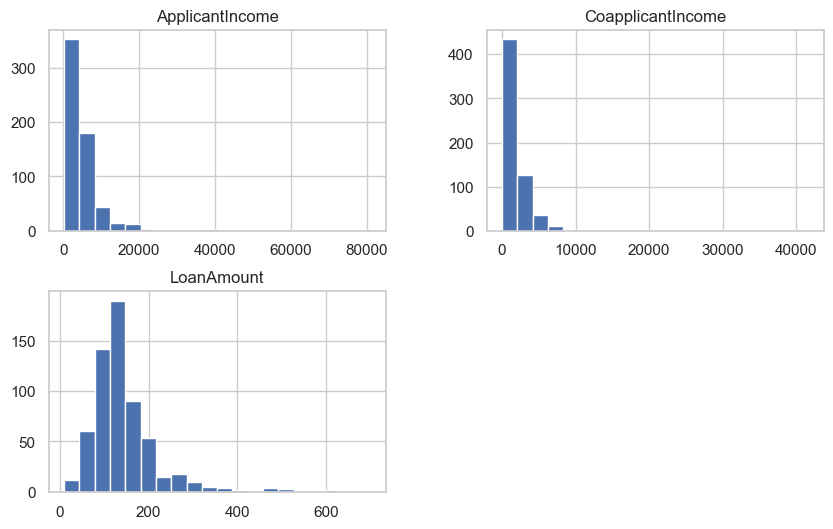

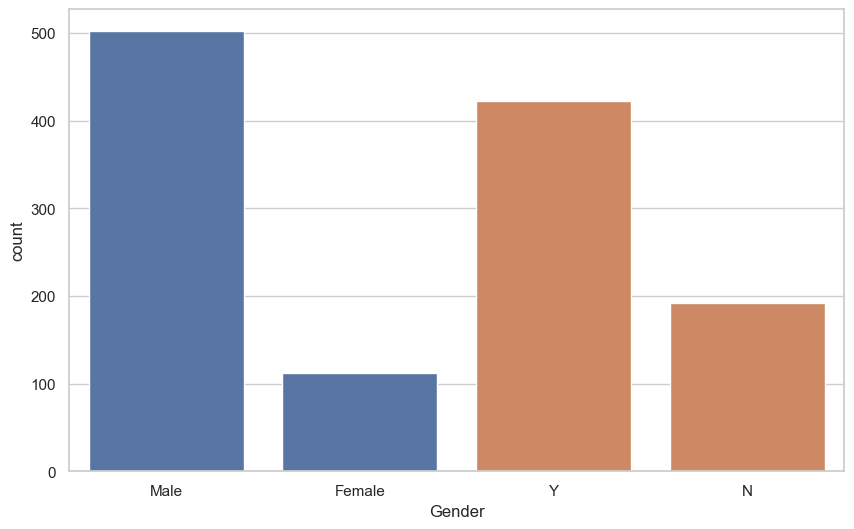

In [14]:

# Visualize distributions of numerical columns
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(bins=20, figsize=(10, 6))
plt.show()

# Categorical column distribution
sns.countplot(data=df, x='Gender')
sns.countplot(data=df, x='Loan_Status')
plt.show()


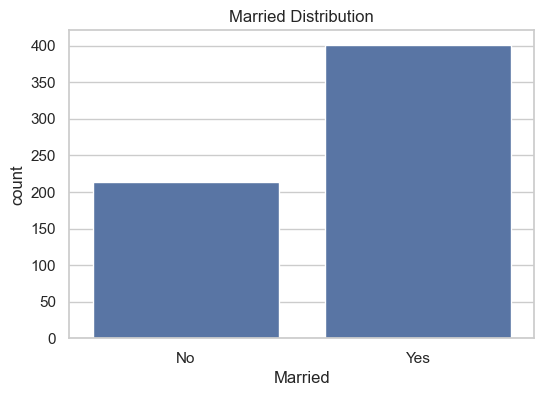

In [15]:
# Count Plot for 'Married' Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Married')
plt.title('Married Distribution')
plt.show()

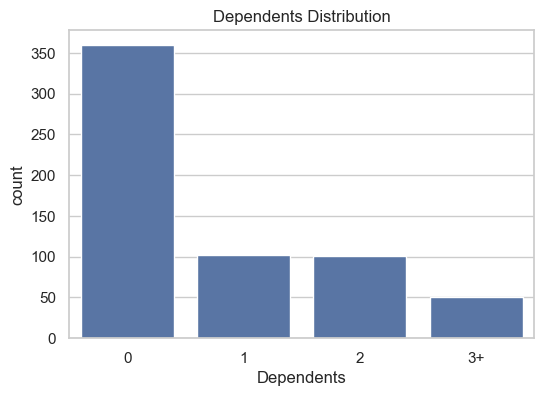

In [16]:
# Count Plot for 'Dependents' Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Dependents')
plt.title('Dependents Distribution')
plt.show()

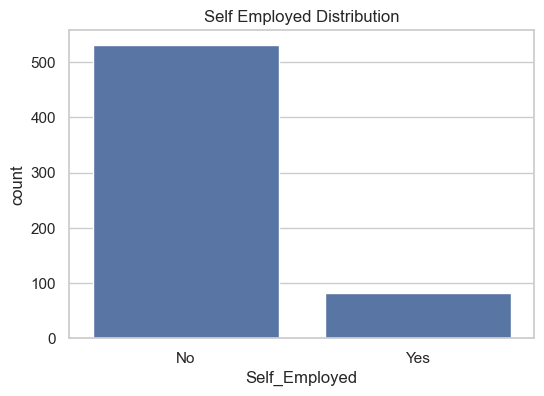

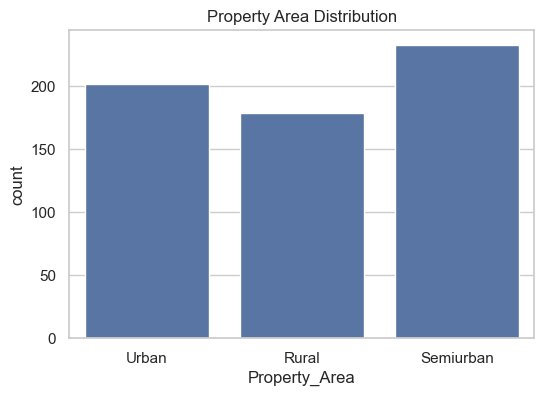

In [17]:
# Count Plot for 'Self_Employed' Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Self_Employed')
plt.title('Self Employed Distribution')
plt.show()

# Count Plot for 'Property_Area' Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Property_Area')
plt.title('Property Area Distribution')
plt.show()


In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
Loan_Amount_Term_counts = df['Loan_Amount_Term'].value_counts()
print(Loan_Amount_Term_counts)

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


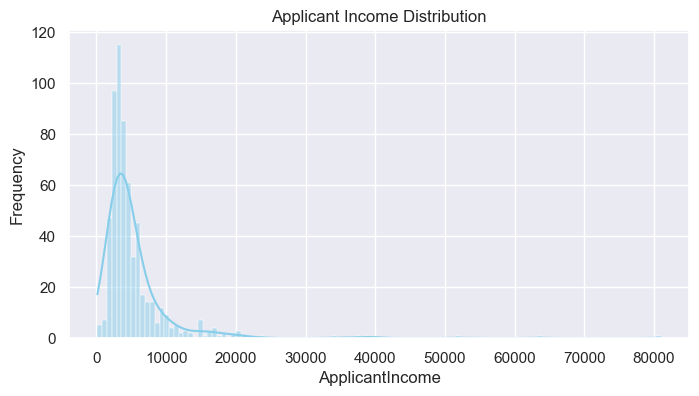

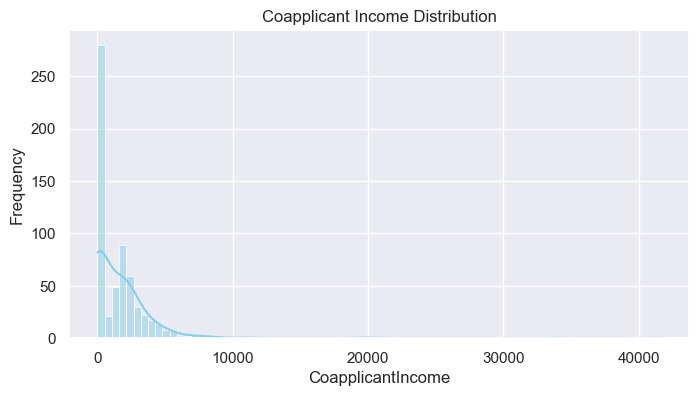

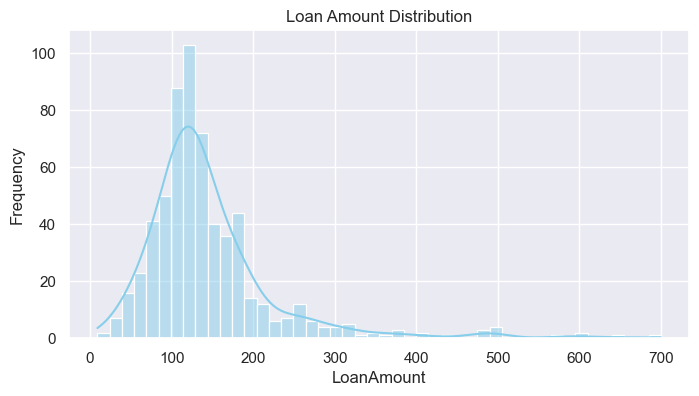

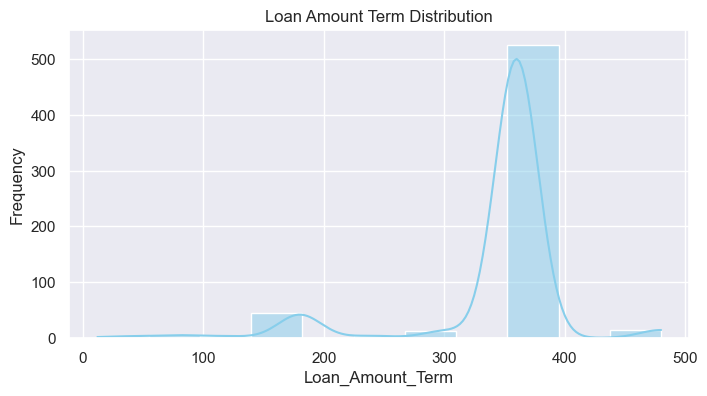

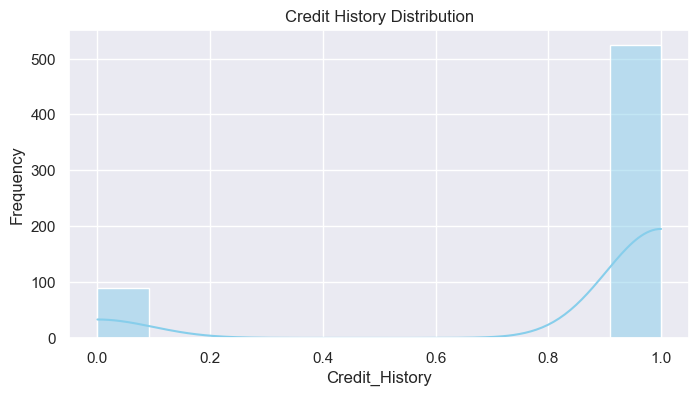

In [18]:
# Set the seaborn theme palette
sns.set_theme(palette="flare")

# Function to plot distribution for a given column
def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, kde=True, color="skyblue")
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column in the cleaned data
plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")
plot_distribution("Loan_Amount_Term", "Loan Amount Term Distribution")
plot_distribution("Credit_History", "Credit History Distribution")

In [19]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [20]:
numeric_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [21]:
categorical_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

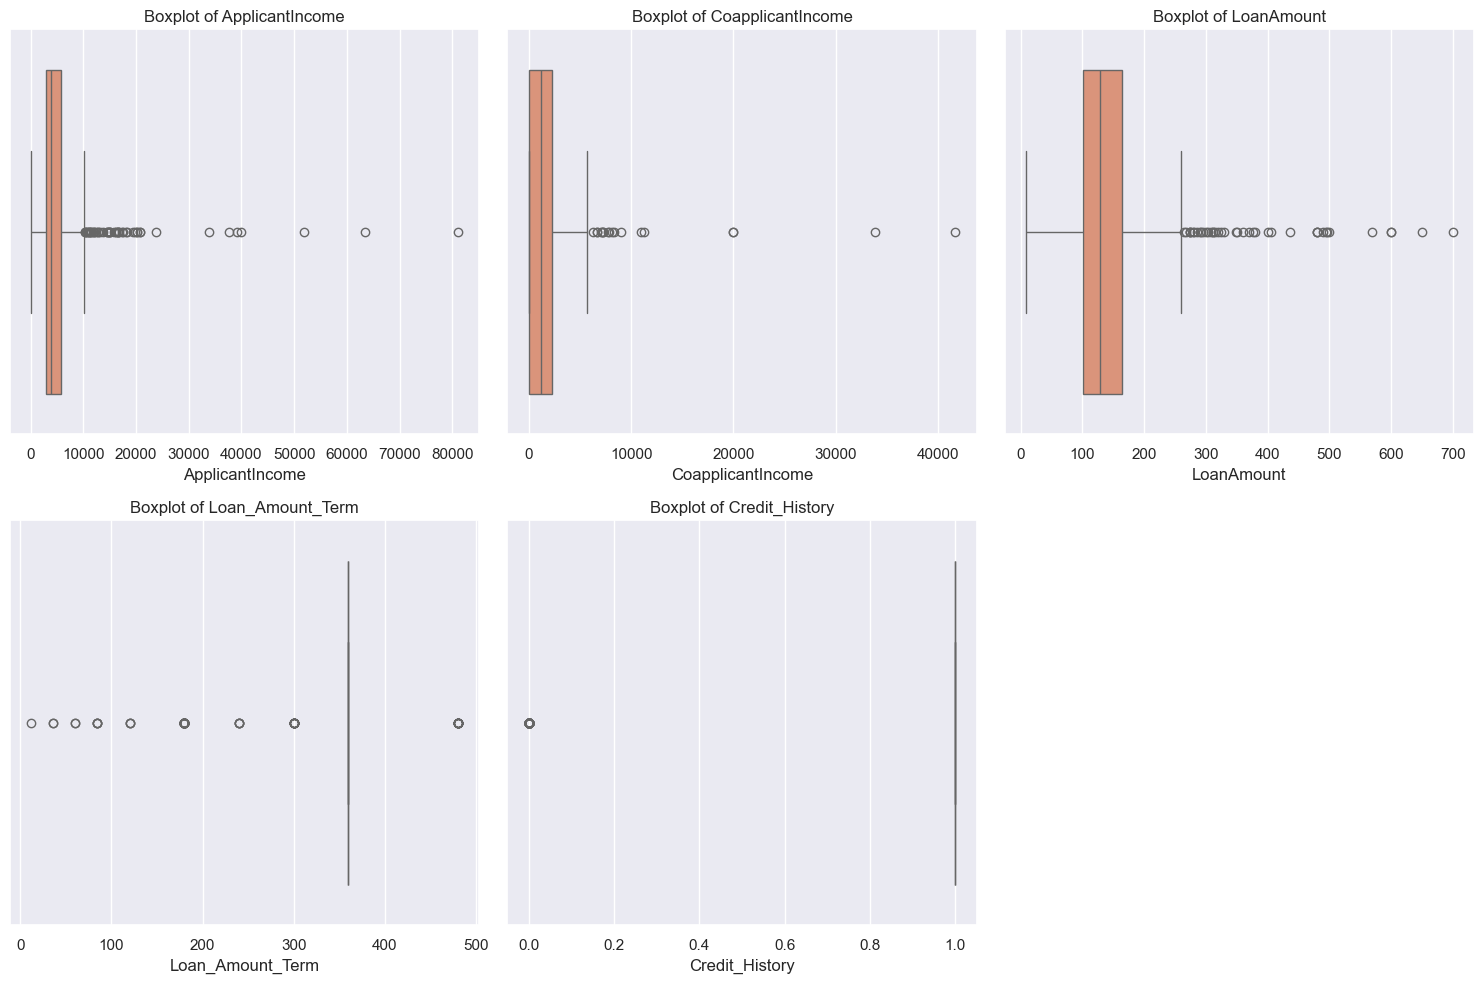

In [22]:
# Plot boxplots for each numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of subplots
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [23]:
# Calculate IQR for 'LoanAmount' and 'Loan_Amount_Term'
Q1_loan_amount = df['LoanAmount'].quantile(0.25)
Q3_loan_amount = df['LoanAmount'].quantile(0.75)
IQR_loan_amount = Q3_loan_amount - Q1_loan_amount

Q1_loan_term = df['Loan_Amount_Term'].quantile(0.25)
Q3_loan_term = df['Loan_Amount_Term'].quantile(0.75)
IQR_loan_term = Q3_loan_term - Q1_loan_term

# Define lower and upper bounds for outliers
lower_bound_loan_amount = Q1_loan_amount - 1.5 * IQR_loan_amount
upper_bound_loan_amount = Q3_loan_amount + 1.5 * IQR_loan_amount

lower_bound_loan_term = Q1_loan_term - 1.5 * IQR_loan_term
upper_bound_loan_term = Q3_loan_term + 1.5 * IQR_loan_term

# Find outliers
outliers_loan_amount = df[(df['LoanAmount'] < lower_bound_loan_amount) | (df['LoanAmount'] > upper_bound_loan_amount)]
outliers_loan_term = df[(df['Loan_Amount_Term'] < lower_bound_loan_term) | (df['Loan_Amount_Term'] > upper_bound_loan_term)]

# Display outliers
print(f"Outliers in LoanAmount: {len(outliers_loan_amount)} rows")
print(f"Outliers in Loan_Amount_Term: {len(outliers_loan_term)} rows")


Outliers in LoanAmount: 41 rows
Outliers in Loan_Amount_Term: 88 rows


In [24]:
# Calculate skewness for the numerical columns
skewness = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].skew()

# Display skewness values
print("Skewness values:")
print(skewness)


Skewness values:
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64


In [25]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Function to cap outliers at the 1st and 99th percentiles
def cap_outliers(df, column):
    lower_percentile = df[column].quantile(0.01)
    upper_percentile = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_percentile, upper=upper_percentile)
    return df

# Creating a copy of the dataframe to work with
df_cleaned = df.copy()

# Loop through the numeric columns and apply appropriate handling for skewed data
for col in numeric_cols:
    # Check the skewness of the column
    skewness_value = df[col].skew()
    
    # If the data is highly positively skewed (skewness > 1), remove outliers
    if skewness_value > 1:
        print(f"Removing outliers for {col} (positively skewed)")
        df_cleaned = remove_outliers(df_cleaned, col)
    
    # If the data is highly negatively skewed (skewness < -1), cap outliers
    elif skewness_value < -1:
        print(f"Capping outliers for {col} (negatively skewed)")
        df_cleaned = cap_outliers(df_cleaned, col)

# Check the shape of the dataframe after processing
print(f"Data shape after handling outliers: {df_cleaned.shape}")

# Optionally, you can check the skewness of the cleaned data
print("\nSkewness after handling outliers:")
print(df_cleaned[numeric_cols].skew())


Removing outliers for ApplicantIncome (positively skewed)
Removing outliers for CoapplicantIncome (positively skewed)
Removing outliers for LoanAmount (positively skewed)
Capping outliers for Loan_Amount_Term (negatively skewed)
Capping outliers for Credit_History (negatively skewed)
Data shape after handling outliers: (520, 13)

Skewness after handling outliers:
ApplicantIncome      1.169844
CoapplicantIncome    0.813900
LoanAmount           0.141491
Loan_Amount_Term    -2.245672
Credit_History      -1.987419
dtype: float64


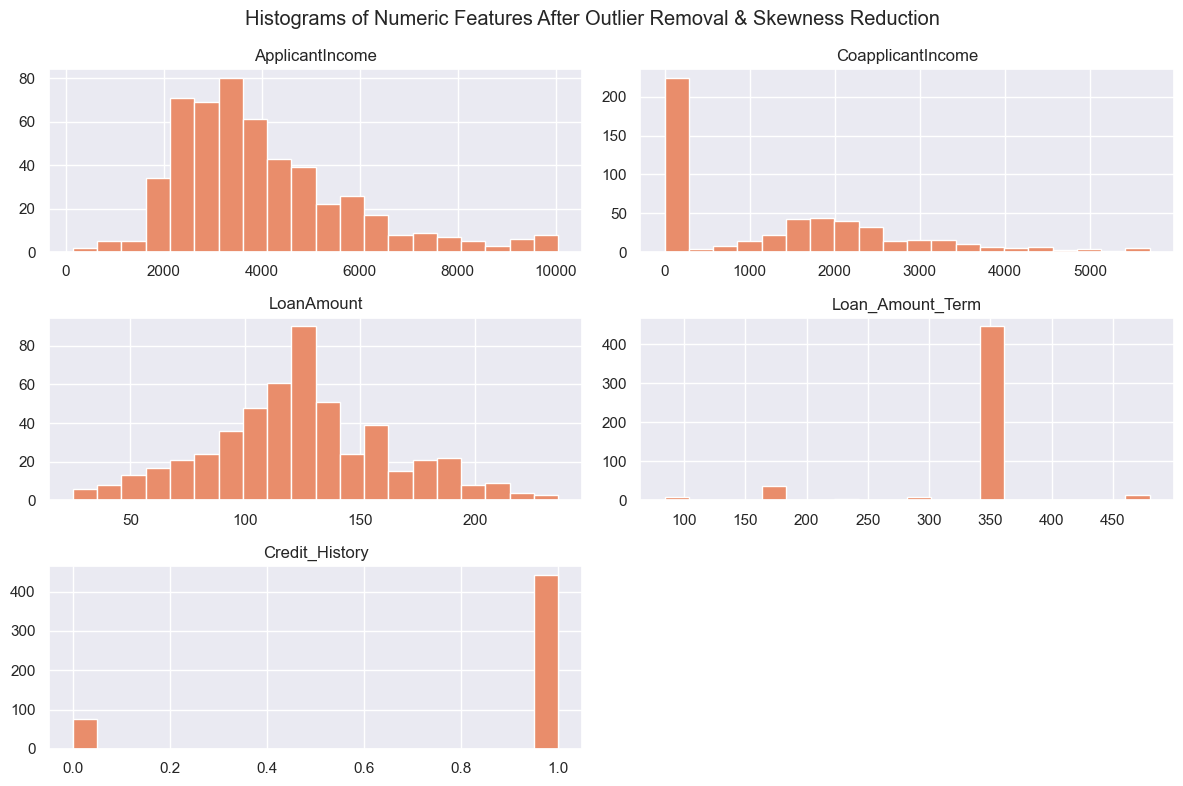

In [26]:
# Plot histograms after outlier removal and skewness reduction
df_cleaned[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numeric Features After Outlier Removal & Skewness Reduction')
plt.tight_layout()
plt.show()


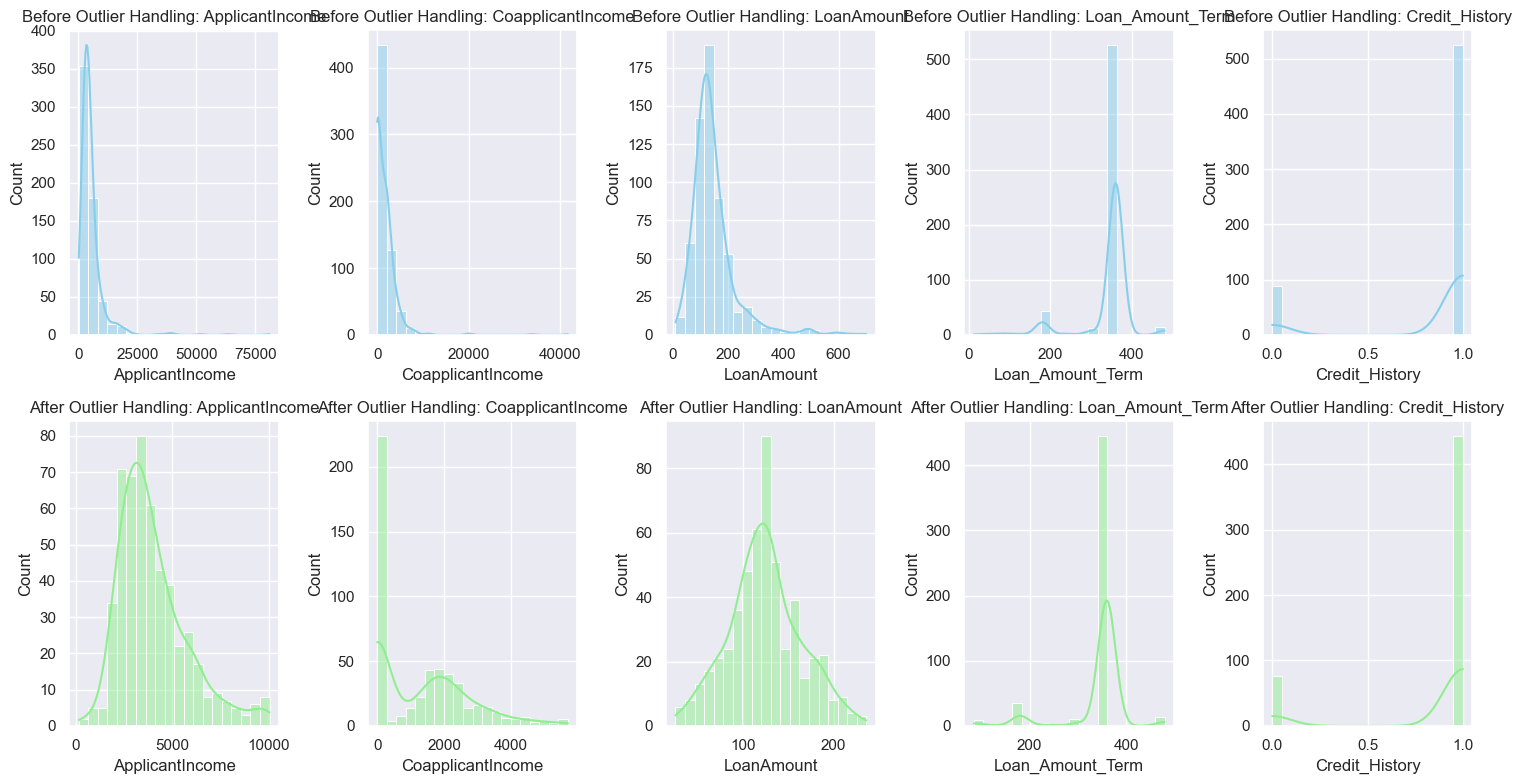

In [27]:
# Create a subplot to visualize the skewness for each numeric column
fig, axes = plt.subplots(2, len(numeric_cols), figsize=(15, 8))

# Loop through the numeric columns and plot before and after skewness handling
for i, col in enumerate(numeric_cols):
    # Plot before outlier handling
    sns.histplot(df[col], kde=True, ax=axes[0, i], color='skyblue', bins=20)
    axes[0, i].set_title(f"Before Outlier Handling: {col}")
    
    # Plot after outlier handling
    sns.histplot(df_cleaned[col], kde=True, ax=axes[1, i], color='lightgreen', bins=20)
    axes[1, i].set_title(f"After Outlier Handling: {col}")

plt.tight_layout()
plt.show()

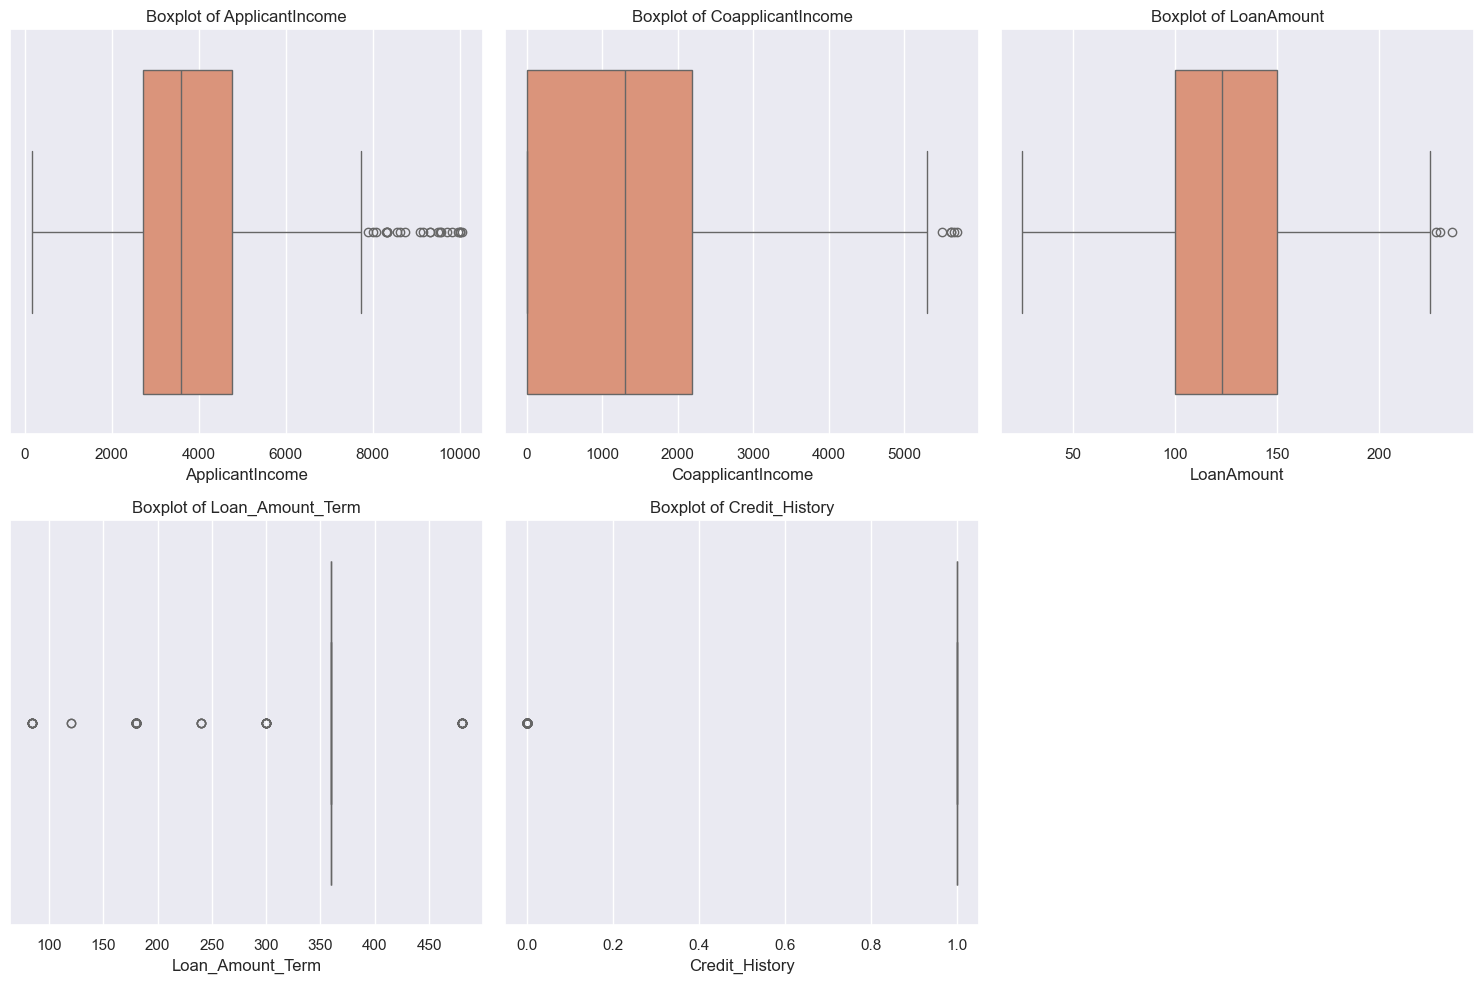

In [28]:

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_cleaned[numeric_cols], 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of subplots
    sns.boxplot(data=df_cleaned[numeric_cols], x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Original DataFrame shape: (614, 13)
Cleaned DataFrame shape: (520, 13)
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
count       520.000000         520.000000  520.000000        520.000000      520.000000
mean       3995.719231        1317.578692  123.651923        342.992308        0.851923
std        1794.687196        1397.402837   39.749892         63.791084        0.355518
min         150.000000           0.000000   25.000000         84.000000        0.000000
25%        2724.500000           0.000000  100.000000        360.000000        1.000000
50%        3590.500000        1293.500000  123.000000        360.000000        1.000000
75%        4772.750000        2191.000000  150.000000        360.000000        1.000000
max       10047.000000        5701.000000  236.000000        480.000000        1.000000


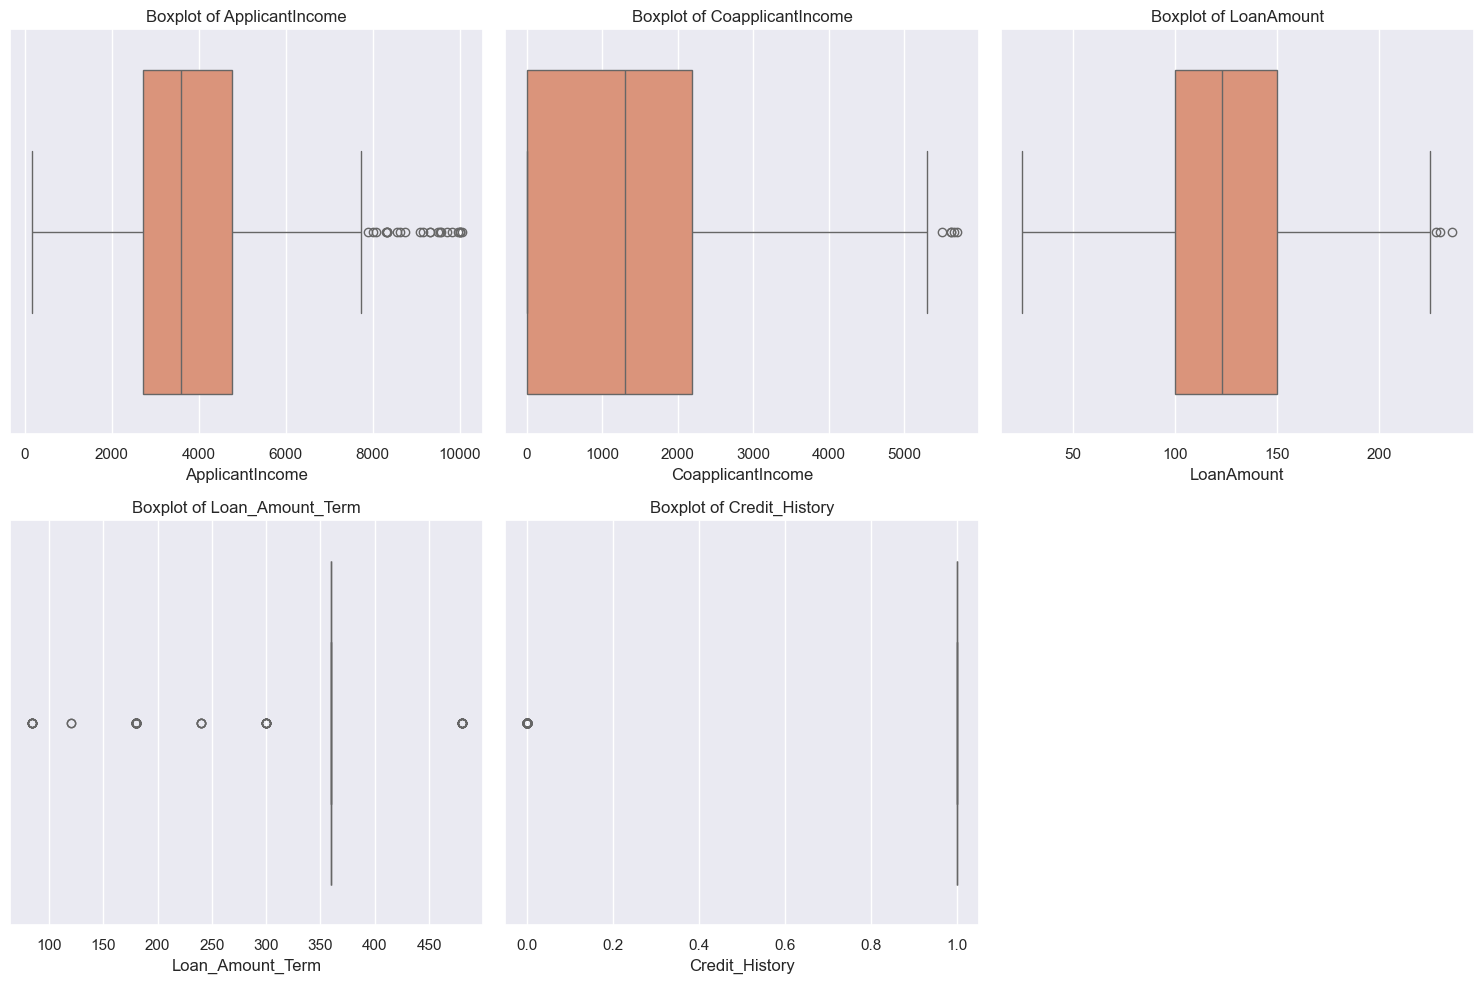

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that outlier handling is applied to df_cleaned
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# If the number of rows are still the same, we can debug whether the outliers are being removed.
# Let's print a few rows to inspect the changes.
print(df_cleaned[numeric_cols].describe())

# Plot boxplots for each numerical column after outlier handling
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_cleaned[numeric_cols], 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of subplots
    sns.boxplot(data=df_cleaned, x=col)  # Use df_cleaned for plotting
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


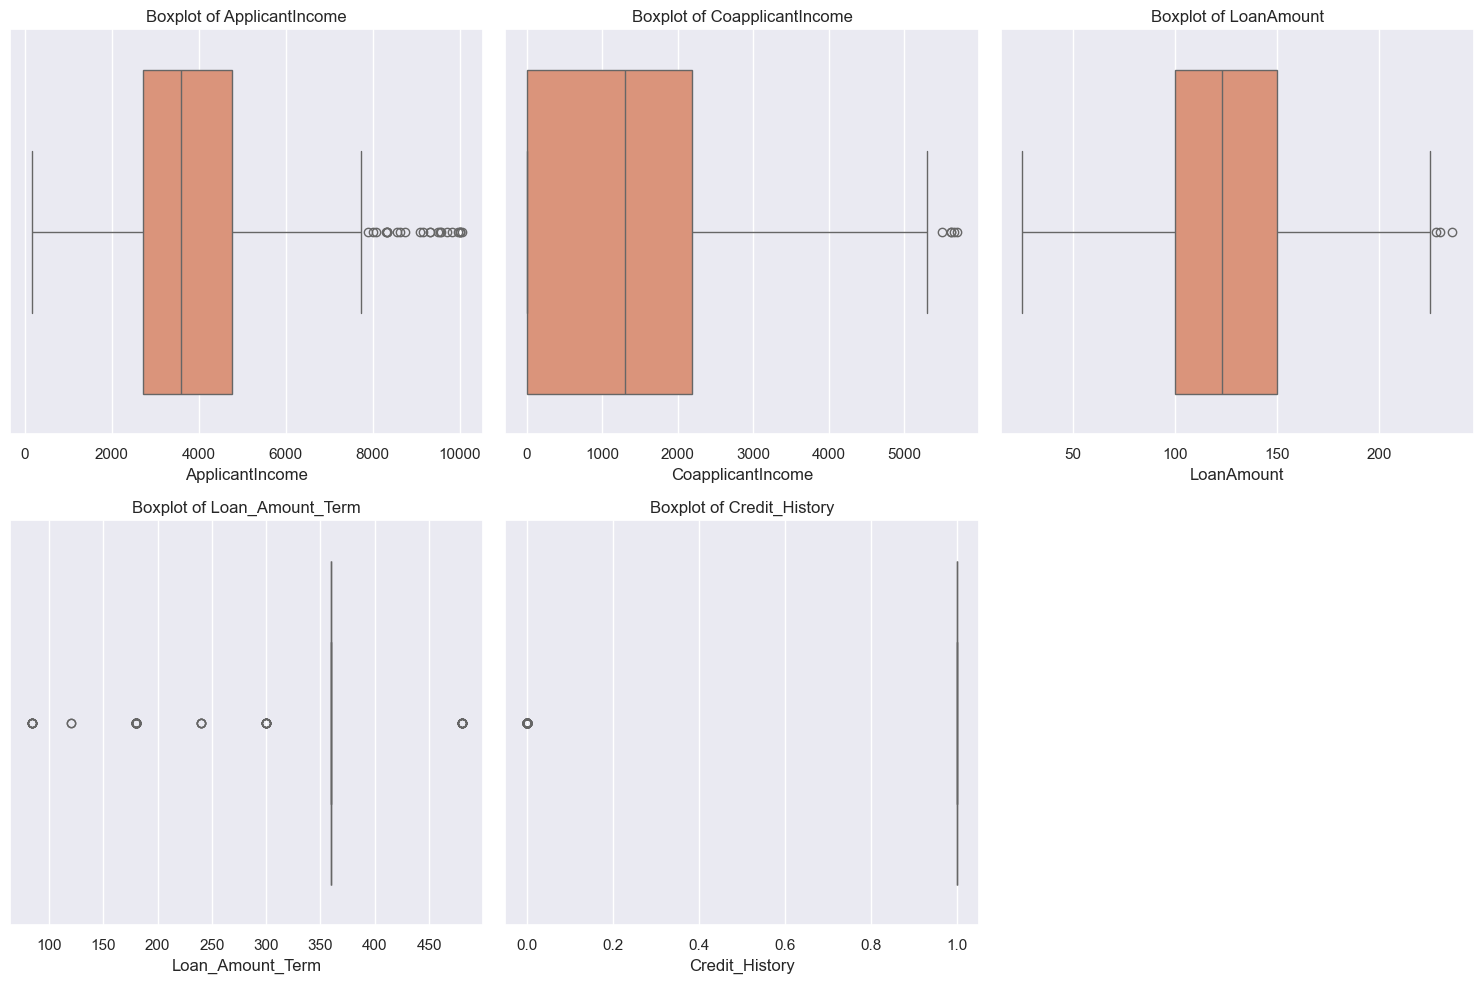

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for each numerical column after outlier handling
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_cleaned[numeric_cols], 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of subplots
    sns.boxplot(data=df_cleaned, x=col)  # Use df_cleaned for plotting
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [31]:
df_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Drop Loan_ID column as it's just an identifier
df_cleaned = df_cleaned.drop(columns=['Loan_ID'])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label encode ordinal variables (like 'Married', 'Education', etc.)
# Encoding 'Married', 'Education' as ordinal
df_cleaned['Married'] = label_encoder.fit_transform(df_cleaned['Married'])
df_cleaned['Education'] = label_encoder.fit_transform(df_cleaned['Education'])


# Convert 'Loan_Status' to numeric (1 for approved, 0 for rejected)
df_cleaned['Loan_Status'] = df_cleaned['Loan_Status'].map({'Y': 1, 'N': 0})

# One-Hot Encoding for nominal variables (Gender, Self_Employed, Property_Area)
# This will create new columns for each category in 'Gender', 'Self_Employed', 'Property_Area'
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender', 'Self_Employed', 'Property_Area'], drop_first=True)

# Check the result
df_cleaned.head()


,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,5849,0.0,128.0,360.0,1.0,1,True,False,False,True
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False,False
2,1,0,0,3000,0.0,66.0,360.0,1.0,1,True,True,False,True
3,1,0,1,2583,2358.0,120.0,360.0,1.0,1,True,False,False,True
4,0,0,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,True


In [43]:
# Convert boolean to numeric
df_cleaned['Gender_Male'] = df_cleaned['Gender_Male'].astype(int)
df_cleaned['Self_Employed_Yes'] = df_cleaned['Self_Employed_Yes'].astype(int)
df_cleaned['Property_Area_Semiurban'] = df_cleaned['Property_Area_Semiurban'].astype(int)
df_cleaned['Property_Area_Urban'] = df_cleaned['Property_Area_Urban'].astype(int)

# Replace '3+' with '3' in the 'Dependents' column
df_cleaned['Dependents'] = df_cleaned['Dependents'].replace('3+', '3')

# Convert 'Dependents' column to numeric
df_cleaned['Dependents'] = pd.to_numeric(df_cleaned['Dependents'])

print(df_cleaned.dtypes)





Married                      int64
Dependents                   int64
Education                    int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Gender_Male                  int64
Self_Employed_Yes            int64
Property_Area_Semiurban      int64
Property_Area_Urban          int64
dtype: object


In [44]:
df_cleaned

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,5849,0.000000,128.0,360.0,1.0,1,1,0,0,1
1,1,1,0,4583,1508.000000,128.0,360.0,1.0,0,1,0,0,0
2,1,0,0,3000,0.000000,66.0,360.0,1.0,1,1,1,0,1
3,1,0,1,2583,2358.000000,120.0,360.0,1.0,1,1,0,0,1
4,0,0,0,6000,0.000000,141.0,360.0,1.0,1,1,0,0,1
6,1,0,1,2333,1516.000000,95.0,360.0,1.0,1,1,0,0,1
7,1,3,0,3036,2504.000000,158.0,360.0,0.0,0,1,0,1,0
8,1,2,0,4006,1526.000000,168.0,360.0,1.0,1,1,0,0,1
10,1,2,0,3200,700.000000,70.0,360.0,1.0,1,1,0,0,1
11,1,2,0,2500,1840.000000,109.0,360.0,1.0,1,1,0,0,1


In [36]:
# Print the column names to verify
print(df_cleaned.columns)

Index(['Married', 'Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'], dtype='object')


In [45]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Married,520.0,0.646154,0.478623,0.0,0.0,1.0,1.00,1.0
Dependents,520.0,0.705769,0.989329,0.0,0.0,0.0,1.00,3.0
Education,520.0,0.251923,0.434535,0.0,0.0,0.0,1.00,1.0
ApplicantIncome,520.0,3995.719231,1794.687196,150.0,2724.5,3590.5,4772.75,10047.0
CoapplicantIncome,520.0,1317.578692,1397.402837,0.0,0.0,1293.5,2191.00,5701.0
LoanAmount,520.0,123.651923,39.749892,25.0,100.0,123.0,150.00,236.0
Loan_Amount_Term,520.0,342.992308,63.791084,84.0,360.0,360.0,360.00,480.0
Credit_History,520.0,0.851923,0.355518,0.0,1.0,1.0,1.00,1.0
Loan_Status,520.0,0.696154,0.460360,0.0,0.0,1.0,1.00,1.0
Gender_Male,520.0,0.811538,0.391457,0.0,1.0,1.0,1.00,1.0


In [46]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  520 non-null    int64  
 1   Dependents               520 non-null    int64  
 2   Education                520 non-null    int64  
 3   ApplicantIncome          520 non-null    int64  
 4   CoapplicantIncome        520 non-null    float64
 5   LoanAmount               520 non-null    float64
 6   Loan_Amount_Term         520 non-null    float64
 7   Credit_History           520 non-null    float64
 8   Loan_Status              520 non-null    int64  
 9   Gender_Male              520 non-null    int64  
 10  Self_Employed_Yes        520 non-null    int64  
 11  Property_Area_Semiurban  520 non-null    int64  
 12  Property_Area_Urban      520 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 56.9 KB


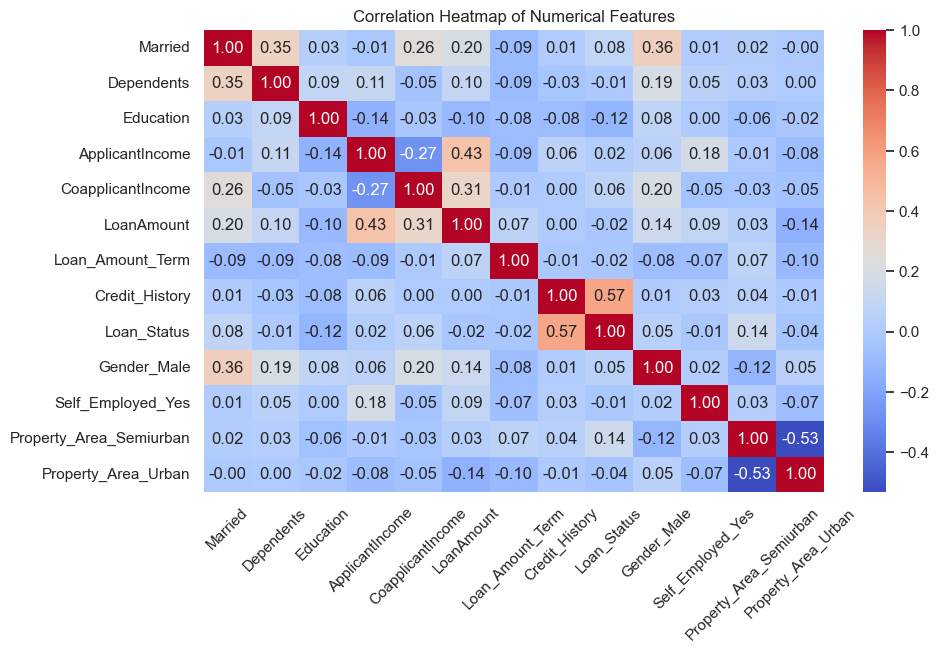

In [50]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
# Change the angle of y-axis tick labels
plt.xticks(rotation=45)
plt.show()


In [53]:
df_cleaned['Total_Income'] = df_cleaned['ApplicantIncome'] + df_cleaned['CoapplicantIncome']

In [54]:
df_cleaned.sample(10)

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_Income
250,1,0,1,1668,3890.0,201.0,360.0,0.0,0,1,0,1,0,5558.0
56,1,0,0,2132,1591.0,96.0,360.0,1.0,1,1,0,1,0,3723.0
488,1,2,0,4583,2083.0,160.0,360.0,1.0,1,1,1,1,0,6666.0
85,0,0,0,2366,2531.0,136.0,360.0,1.0,1,1,0,1,0,4897.0
436,0,0,0,1926,1851.0,50.0,360.0,1.0,1,1,0,1,0,3777.0
336,1,1,0,5250,688.0,160.0,360.0,1.0,1,1,0,0,0,5938.0
601,1,0,1,2894,2792.0,155.0,360.0,1.0,1,1,0,0,0,5686.0
134,0,0,0,4895,0.0,102.0,360.0,1.0,1,1,0,1,0,4895.0
562,1,0,0,5923,2054.0,211.0,360.0,1.0,1,1,0,0,0,7977.0
530,1,0,0,1025,5500.0,216.0,360.0,1.0,1,1,0,0,0,6525.0


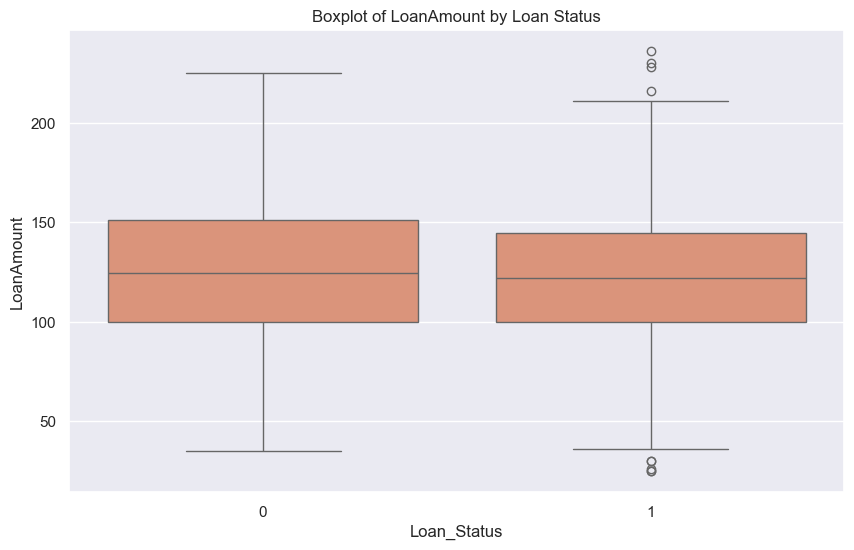

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Loan_Status', y='LoanAmount')
plt.title('Boxplot of LoanAmount by Loan Status')
plt.show()

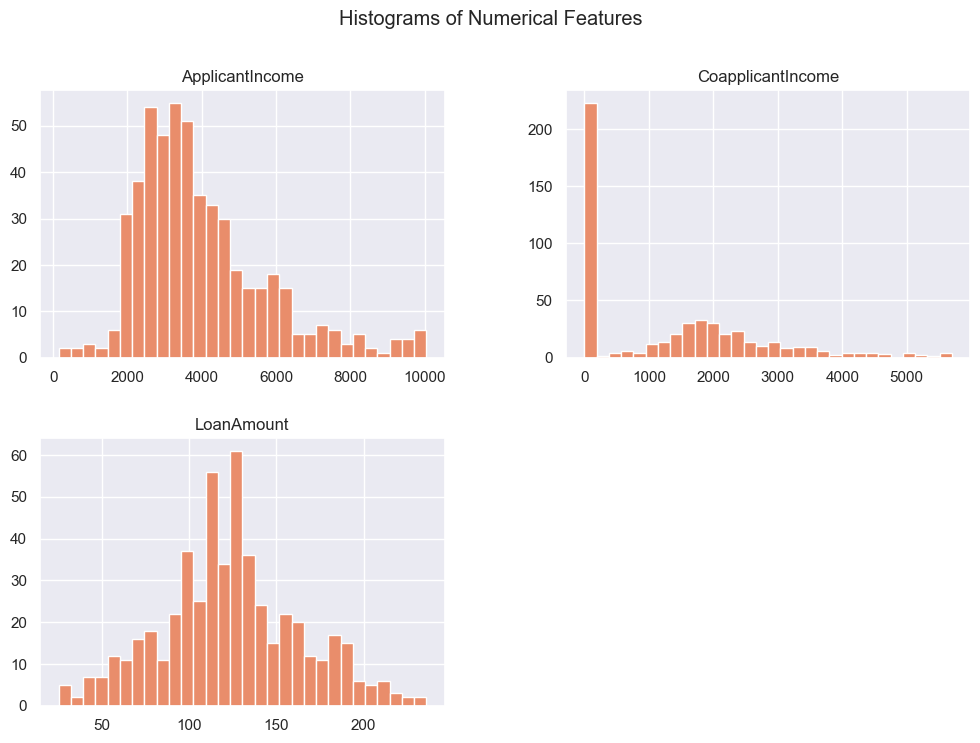

In [56]:
df_cleaned.hist(column=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [110]:
X_train.columns

Index(['Married', 'Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Total_Income'], dtype='object')

In [57]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('Loan_Status', axis=1)
y = df_cleaned['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [59]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape) 
print("Shape of y_train", y_train.shape) 
print("Shape of y_test", y_test.shape)

Shape of X_train (364, 13)
Shape of X_test (156, 13)
Shape of y_train (364,)
Shape of y_test (156,)


In [61]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Classifier Accuracy:", accuracy_lr)

# Classification Report
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))




Logistic Regression Classifier Accuracy: 0.8205128205128205

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.49      0.63        49
           1       0.81      0.97      0.88       107

    accuracy                           0.82       156
   macro avg       0.85      0.73      0.76       156
weighted avg       0.83      0.82      0.80       156


Logistic Regression Confusion Matrix:
 [[ 24  25]
 [  3 104]]


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification Report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.8269230769230769

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.57      0.67        49
           1       0.83      0.94      0.88       107

    accuracy                           0.83       156
   macro avg       0.83      0.76      0.78       156
weighted avg       0.83      0.83      0.82       156


Random Forest Confusion Matrix:
 [[ 28  21]
 [  6 101]]


In [64]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes Classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Classifier Accuracy:", accuracy_nb)

# Classification Report
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Classifier Accuracy: 0.8205128205128205

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.49      0.63        49
           1       0.81      0.97      0.88       107

    accuracy                           0.82       156
   macro avg       0.85      0.73      0.76       156
weighted avg       0.83      0.82      0.80       156


Naive Bayes Confusion Matrix:
 [[ 24  25]
 [  3 104]]


In [65]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

# Classification Report
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier Accuracy: 0.75

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.61        49
           1       0.82      0.81      0.82       107

    accuracy                           0.75       156
   macro avg       0.71      0.71      0.71       156
weighted avg       0.75      0.75      0.75       156


Decision Tree Confusion Matrix:
 [[30 19]
 [20 87]]


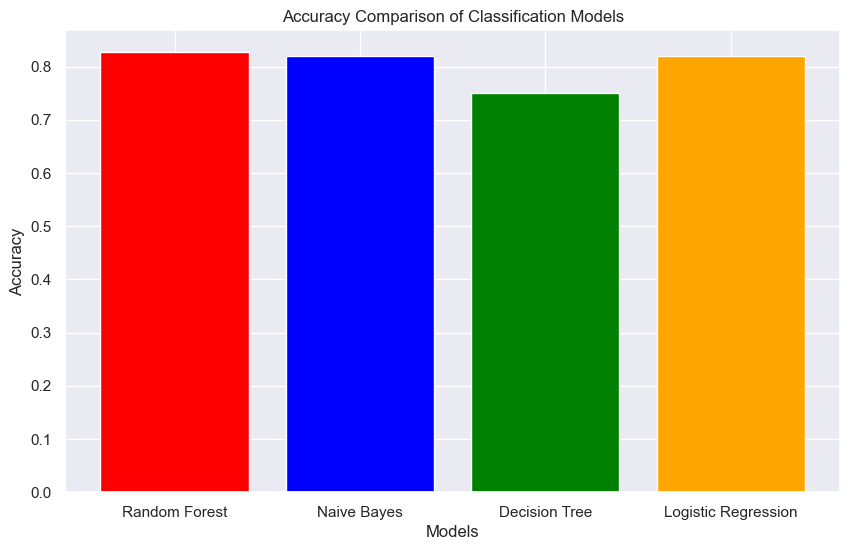

In [66]:
# Create a dictionary to store the models' accuracies, including Logistic Regression
accuracy_scores = {
    "Random Forest": accuracy_rf,
    "Naive Bayes": accuracy_nb,
    "Decision Tree": accuracy_dt,
    "Logistic Regression": accuracy_lr  # Add Logistic Regression here
}

# Plot the accuracy scores of all models
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['red', 'blue', 'green', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Classification Models")
plt.show()


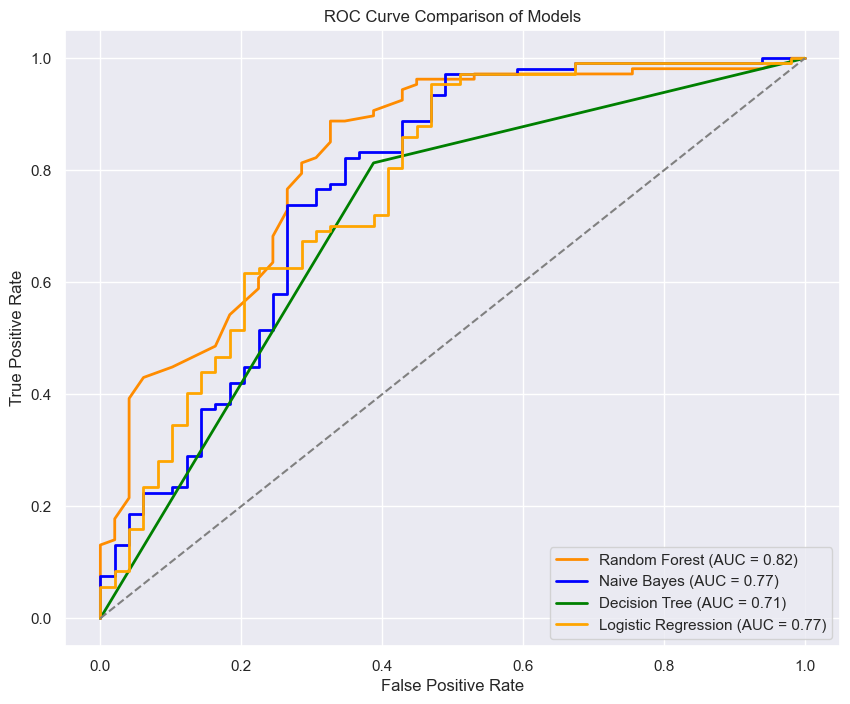

In [67]:
from sklearn.metrics import roc_curve, auc
# ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models')
plt.legend(loc="lower right")
plt.show()


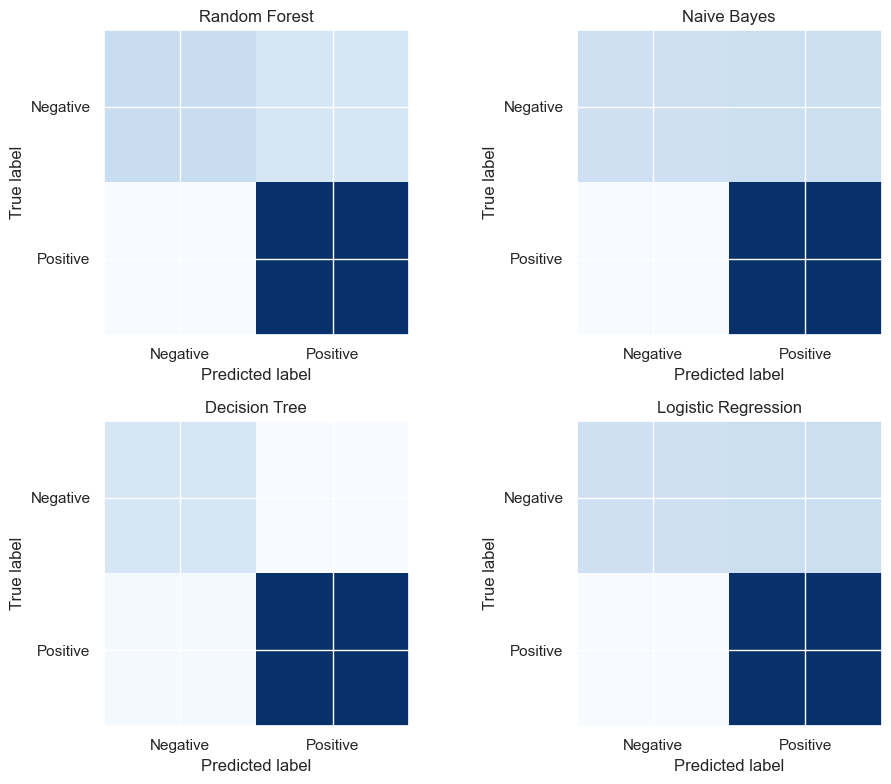

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for each model
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plotting the confusion matrix
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 0].set_title('Random Forest')
axs[0, 1].imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 1].set_title('Naive Bayes')
axs[1, 0].imshow(cm_dt, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 0].set_title('Decision Tree')
axs[1, 1].imshow(cm_lr, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 1].set_title('Logistic Regression')

for i in range(2):
    for j in range(2):
        axs[i, j].set_xticks([0, 1])
        axs[i, j].set_yticks([0, 1])
        axs[i, j].set_xlabel('Predicted label')
        axs[i, j].set_ylabel('True label')
        axs[i, j].set_xticklabels(['Negative', 'Positive'])
        axs[i, j].set_yticklabels(['Negative', 'Positive'])
        axs[i, j].set_ylim(1.5, -0.5)
        
plt.tight_layout()
plt.show()


In [69]:
from sklearn.metrics import classification_report

# Classification report for each model
report_rf = classification_report(y_test, y_pred_rf)
report_nb = classification_report(y_test, y_pred_nb)
report_dt = classification_report(y_test, y_pred_dt)
report_lr = classification_report(y_test, y_pred_lr)

print("Random Forest Classification Report:\n", report_rf)
print("Naive Bayes Classification Report:\n", report_nb)
print("Decision Tree Classification Report:\n", report_dt)
print("Logistic Regression Classification Report:\n", report_lr)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.57      0.67        49
           1       0.83      0.94      0.88       107

    accuracy                           0.83       156
   macro avg       0.83      0.76      0.78       156
weighted avg       0.83      0.83      0.82       156

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.49      0.63        49
           1       0.81      0.97      0.88       107

    accuracy                           0.82       156
   macro avg       0.85      0.73      0.76       156
weighted avg       0.83      0.82      0.80       156

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.61        49
           1       0.82      0.81      0.82       107

    accuracy                           0.75       156
   macro avg    

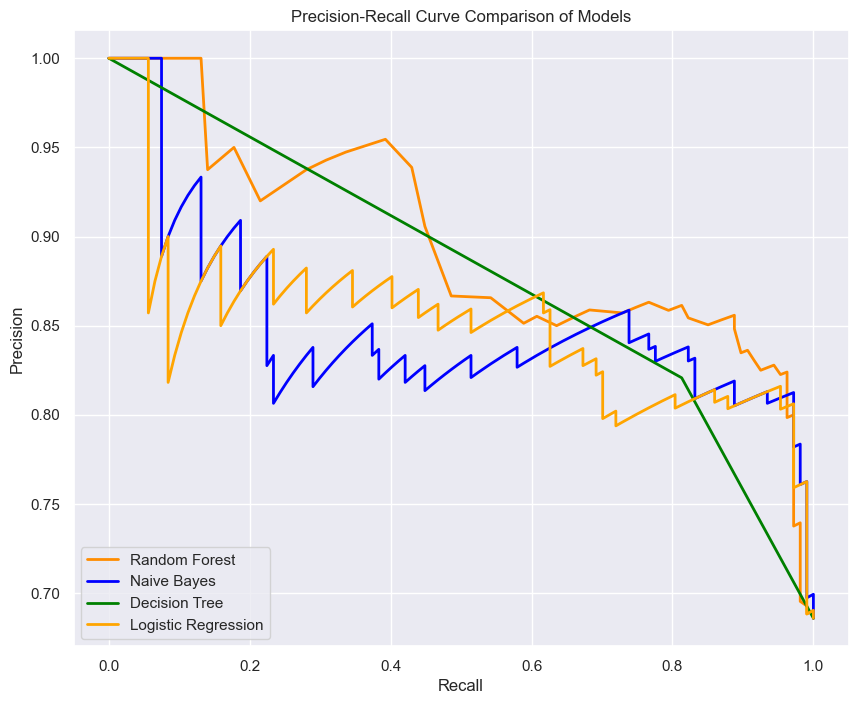

In [70]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Precision-Recall curve for each model
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
precision_nb, recall_nb, _ = precision_recall_curve(y_test, nb_model.predict_proba(X_test_scaled)[:, 1])
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])

# Plotting the Precision-Recall curves
plt.figure(figsize=(10, 8))
plt.plot(recall_rf, precision_rf, color='darkorange', lw=2, label='Random Forest')
plt.plot(recall_nb, precision_nb, color='blue', lw=2, label='Naive Bayes')
plt.plot(recall_dt, precision_dt, color='green', lw=2, label='Decision Tree')
plt.plot(recall_lr, precision_lr, color='orange', lw=2, label='Logistic Regression')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison of Models')
plt.legend(loc="lower left")
plt.show()


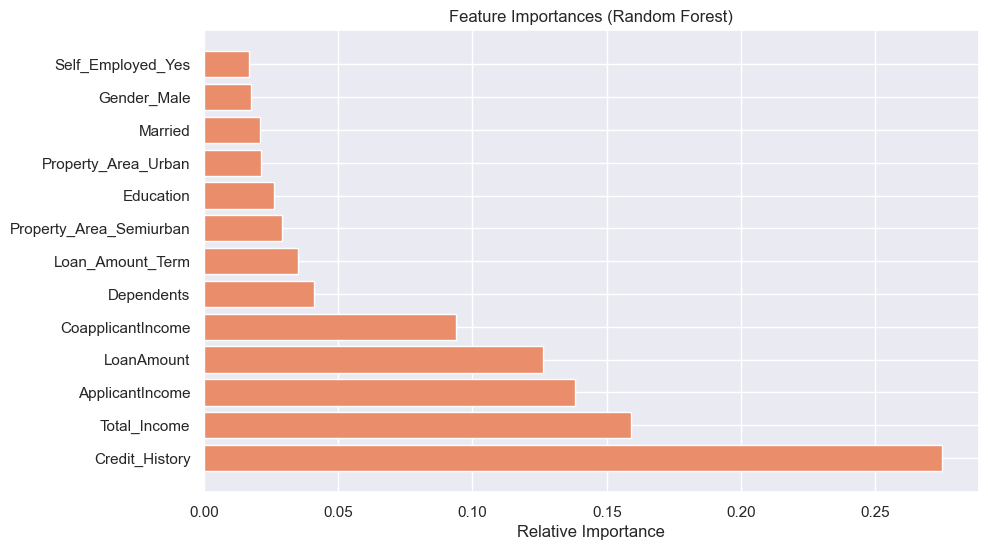

In [71]:
# Plotting feature importances for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), features[indices])
plt.xlabel("Relative Importance")
plt.show()


In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.83


In [75]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [78]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores: ", scores)
print("Mean cross-validation accuracy: {:.2f}".format(scores.mean()))


Cross-validation accuracy scores:  [0.78082192 0.80821918 0.83561644 0.82191781 0.81944444]
Mean cross-validation accuracy: 0.81


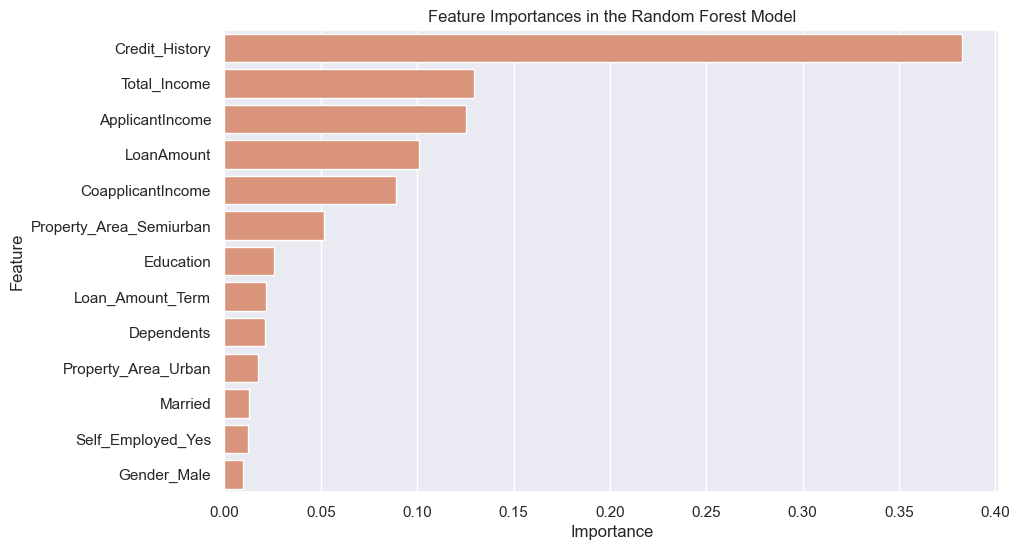

In [79]:
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importances in the Random Forest Model')
plt.show()


In [80]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

print('Final Model Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Final Model Accuracy: 0.8205128205128205
Confusion Matrix:
 [[ 26  23]
 [  5 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.53      0.65        49
           1       0.82      0.95      0.88       107

    accuracy                           0.82       156
   macro avg       0.83      0.74      0.76       156
weighted avg       0.82      0.82      0.81       156



In [93]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.6/124.9 MB 15.0 MB/s eta 0:00:09
   -- ------------------------------------- 6.3/124.9 MB 14.8 MB/s eta 0:00:09
   --- ------------------------------------ 9.7/124.9 MB 15.9 MB/s eta 0:00:08
   --- ------------------------------------ 11.8/124.9 MB 14.2 MB/s eta 0:00:08
   ---- ----------------------------------- 15.2/124.9 MB 14.5 MB/s eta 0:00:08
   ----- ---------------------------------- 18.4/124.9 MB 14.6 MB/s eta 0:00:08
   ------ --------------------------------- 21.0/124.9 MB 14.4 MB/s eta 0:00:08
   ------- -------------------------------- 23.9/124.9 MB 14.4 MB/s eta 0:00:08
   -------- ------------------------------- 27.5/124.9 MB 14.8 MB/s eta 0:00:07
   --------- ------------------------------ 29.6/124.9 MB 14.2 MB/s eta 0:00:07
   ---------- ----------------------------- 32.2/124.9 MB 14.1 MB/s eta 0:00:07
   ----------- ---------------------------- 34.9/124


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier( eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = xgb_model.predict(X_test)

print('XGBoost Model Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


XGBoost Model Accuracy: 0.8012820512820513
Confusion Matrix:
 [[26 23]
 [ 8 99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.53      0.63        49
           1       0.81      0.93      0.86       107

    accuracy                           0.80       156
   macro avg       0.79      0.73      0.75       156
weighted avg       0.80      0.80      0.79       156



In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print('Best XGBoost Model Accuracy on Test Set:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation accuracy: 0.83
Best XGBoost Model Accuracy on Test Set: 0.8205128205128205
Confusion Matrix:
 [[ 25  24]
 [  4 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.51      0.64        49
           1       0.81      0.96      0.88       107

    accuracy                           0.82       156
   macro avg       0.84      0.74      0.76       156
weighted avg       0.83      0.82      0.81       156



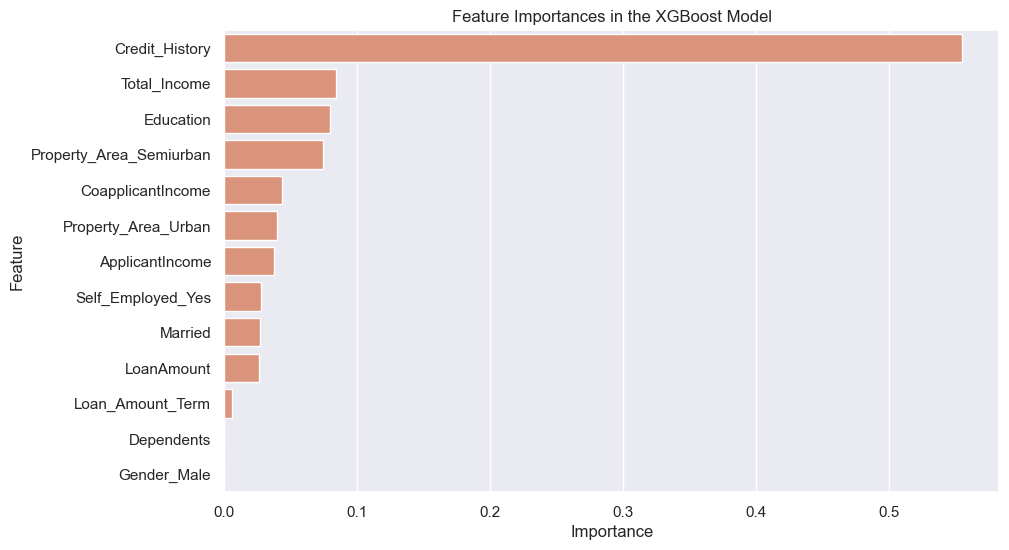

In [99]:
# Feature importance analysis
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importances in the XGBoost Model')
plt.show()


In [100]:
import joblib

# Assuming `final_model` is your trained Random Forest model
joblib.dump(final_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [5]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('random_forest_model.pkl')

# Sample input data similar to what your app receives
data = pd.DataFrame({
    'Married': [1],  # Example: Married = Yes
    'Dependents': [1],  # Example: No dependents
    'Education': [0],  # Example: Graduated
    'ApplicantIncome': [3504],  # Example income
    'CoapplicantIncome': [0],  # Example income
    'LoanAmount': [450],  # Example loan amount
    'Loan_Amount_Term': [36],  # Example loan term in months
    'Credit_History': [0.0],  # Example credit history (good)
    'Gender_Male': [0],  # Example: Male
    'Self_Employed_Yes': [0],  # Example: No self-employed
    'Property_Area_Semiurban': [0],  # Example: Semiurban (no)
    'Property_Area_Urban': [1],  # Example: Urban (yes)
    'Total_Income': [35040]  # Total income = ApplicantIncome + CoapplicantIncome
})

# Make a prediction
prediction = model.predict(data)

# Print the result
print("Prediction:", prediction)


Prediction: [0]


In [7]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('random_forest_model.pkl')

# Another sample input data with different values
data = pd.DataFrame({
    'Married': [0],  # Example: Not married
    'Dependents': [2],  # Example: 2 dependents
    'Education': [0],  # Example: Not graduated
    'ApplicantIncome': [3000],  # Example income
    'CoapplicantIncome': [1500],  # Example coapplicant income
    'LoanAmount': [120],  # Example loan amount
    'Loan_Amount_Term': [180],  # Example loan term in months
    'Credit_History': [1.0],  # Example credit history (poor)
    'Gender_Male': [0],  # Example: Female
    'Self_Employed_Yes': [1],  # Example: Self-employed
    'Property_Area_Semiurban': [1],  # Example: Semiurban
    'Property_Area_Urban': [0],  # Example: Not urban
    'Total_Income': [4500]  # Total income = ApplicantIncome + CoapplicantIncome
})

# Make a prediction
prediction = model.predict(data)

# Print the result
print("Prediction:", prediction)


Prediction: [1]
